
The dataset(An NOAA dataset) is to use for this project. 
Note: The data comes from a subset of The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

The following variables:
id : station identification code
date : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
element : indicator of element type
TMAX : Maximum temperature (tenths of degrees C)
TMIN : Minimum temperature (tenths of degrees C)
value : data value for element (tenths of degrees C)
For this assignment, you must:

1.python code that provides line graph of the record high and record low temperatures by month of the year over the period 2005-2014. 

2.The area between the record high and record low temperatures for each day should be shaded.

3.Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

4.Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.

5.Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.


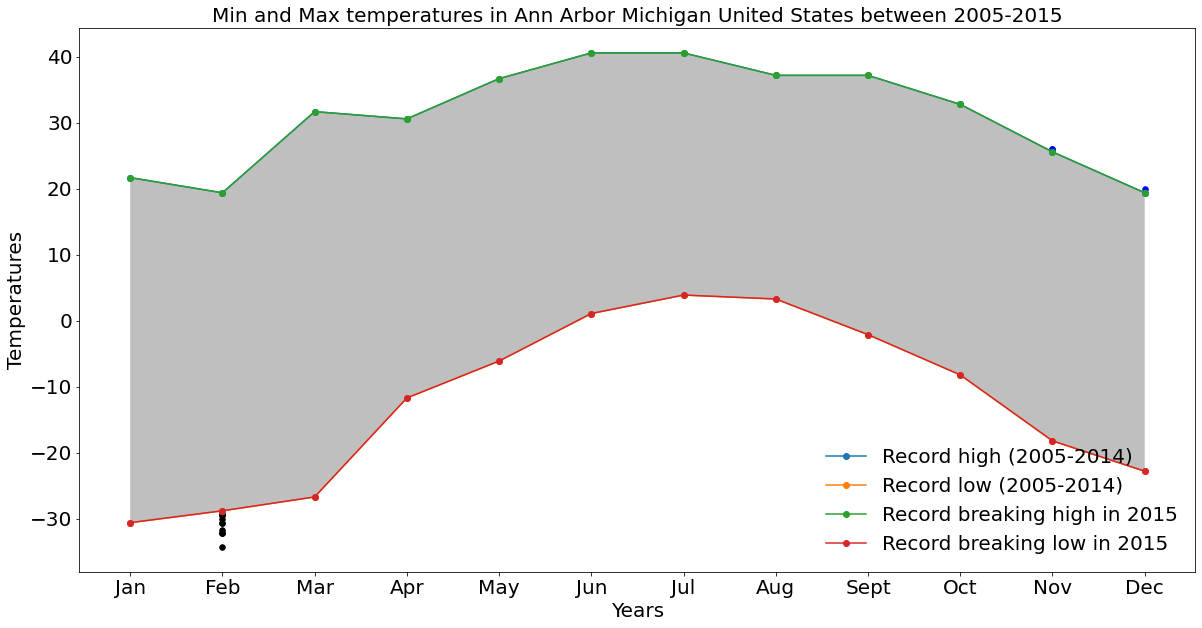

In [12]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv(r'E:\Protfolio\Applied Plotting, Charting & Data Representation in Python/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

#convert temperature values (tenths of a degree) to degrees celsius.   
df['Data_Value'] = df['Data_Value']/10


#converting date column to date timestamp object
df['Date'] = pd.DatetimeIndex(df['Date']).date #.date object = ‘the date time of the timestamp without the timezone information’



#list of 29 Febs appearing in each leap year
lis = ['2922008','2922012']


#converting into list of datetime.date objects
dates = [datetime.datetime.strptime(i, '%d%m%Y').date() for i in lis] 


#remove all 29 February dates
df = df[~df['Date'].isin(dates)]


#creating a separate column for the month
df['Month'] = pd.DatetimeIndex(df['Date']).month


#we are colleting dates between 2005 - 2014, so want to remove any data from dates after 31 Dec 2014
#creating datetime.date format of cutoff date
a= '31122014'

#converting the(a) string into datetime.date object
cutoff_date = datetime.datetime.strptime(a,'%d%m%Y').date()

#dataframe for values between 31 Dec 2014
df2 = df[df['Date'] <= cutoff_date]


#returning dates after cutoff date(31 Dec 2014) 
df3 = df[df['Date'] > cutoff_date]



#identify the min and max values in each month using groupby
df_min = df2[df2['Element'] =='TMIN'].groupby('Month').aggregate({'Data_Value':np.min})
df_max = df2[df2['Element'] == 'TMAX'].groupby('Month').aggregate({'Data_Value':np.max})


#visualization process
plt.plot(df_max, '-o',df_min,'-o')



#shadding
x = df_max.index.values
plt.plot(df_max, '-o',df_min,'-o')
plt.gca().fill_between(x,df_min.values.flatten(),df_max.values.flatten(),facecolor='grey',alpha=0.5)



#superimpose scatterplot
df3_max = df3[df3['Data_Value'] > df3['Month'].map(df_max['Data_Value'])]
df4_min = df3[df3['Data_Value'] < df3['Month'].map(df_min['Data_Value'])]
plt.scatter(df3_max.Month.tolist(),df3_max['Data_Value'],s=30,c='blue') #values over max
plt.scatter(df4_min.Month.tolist(),df4_min['Data_Value'],s=30,c='black') #values under min


#we want to show all the x values and rename according to the month
plt.xticks(list(df_max.index),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])








plt.title('Min and Max temperatures in Ann Arbor Michigan United States between 2005-2015', fontsize=20)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Temperatures', fontsize=20)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.legend(['Record high (2005-2014)','Record low (2005-2014)','Record breaking high in 2015','Record breaking low in 2015'],loc=4,fontsize=20,frameon=False)
plt.tick_params(labelsize=20)
plt.show()